In [1]:
import os
import numpy as np
from dacl10k import utils
import cv2
import matplotlib.pyplot as plt

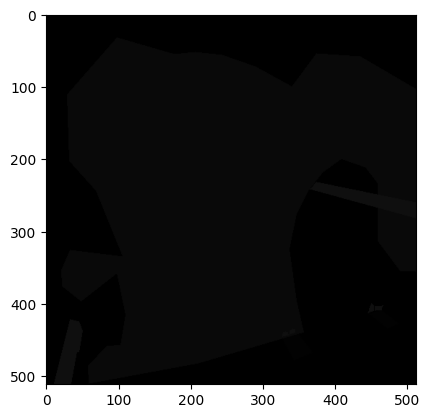

In [88]:
test_pic = cv2.imread(r"ttest_label_001_2.png")
plt.imshow(test_pic)

## Segmentation maps for Train

In [19]:
folder_path = (r"C:\aryan\Cracks\data\dacl10k_v2_devphase\resized\data\seg_maps_aug\train")

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

path_to_labels_train = "C:/aryan/Cracks/data/dacl10k_v2_devphase/resized/data/seg_maps_aug/train/"
path_to_masks_train = "C:/aryan/Cracks/data/dacl10k_v2_devphase/resized/data/annotations_json_aug/train/"

train_masks = os.listdir(path_to_masks_train)
num_classes = 19

# train_masks[:2]
for m in train_masks:
    # Create an empty array for the composite image
    composite_mask = np.zeros((512, 512, 3), dtype=np.uint8)

    mask = utils.labelme2mask(path_to_masks_train + m)

    for class_index in range(1, num_classes + 1):
        class_mask = mask[:, :, class_index - 1]
        composite_mask[class_mask > 0] = class_index

# Display the composite image
    cv2.imwrite(path_to_labels_train + m[:-5] + ".png",composite_mask)

## Segmentation maps for Validation

In [6]:
folder_path = r"C:\aryan\Cracks\data\dacl10k_v2_devphase\resized\640x640\seg_maps_aug\validation"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

path_to_labels_validation = "C:/aryan/Cracks/data/dacl10k_v2_devphase/resized/640x640/seg_maps_aug/validation/"
path_to_masks_validation = "C:/aryan/Cracks/data/dacl10k_v2_devphase/resized/640x640/annotations/validation/"
val_masks = os.listdir(path_to_masks_validation)
num_classes = 19

# train_masks[:2]
for m in val_masks:
    # Create an empty array for the composite image
    composite_mask = np.zeros((640, 640, 3), dtype=np.uint8)

    mask = utils.labelme2mask(path_to_masks_validation + m)

    for class_index in range(1, num_classes + 1):
        class_mask = mask[:, :, class_index - 1] 
        composite_mask[class_mask > 0] = class_index

# Display the composite image
    cv2.imwrite(path_to_labels_validation + m[:-5] + ".png",composite_mask)

# Test Space

In [85]:
path_to_masks_train = "C:/Users/vravula/Downloads/Cracks/data/dacl10k_v2_devphase/resized/data/annotations_json/train/"
train_masks = os.listdir(path_to_masks_train)
num_classes = 19

# Define RGB colors for each of the 19 classes
class_colors = [
    (255, 0, 0),     # Class 0: Red
    (0, 255, 0),     # Class 1: Green
    (0, 0, 255),     # Class 2: Blue
    (255, 255, 0),   # Class 3: Yellow
    (255, 0, 255),   # Class 4: Magenta
    (0, 255, 255),   # Class 5: Cyan
    (128, 0, 0),     # Class 6: Maroon
    (0, 128, 0),     # Class 7: Green
    (0, 0, 128),     # Class 8: Navy
    (128, 128, 0),   # Class 9: Olive
    (128, 0, 128),   # Class 10: Purple
    (0, 128, 128),   # Class 11: Teal
    (192, 192, 192), # Class 12: Silver
    (128, 128, 128), # Class 13: Gray
    (255, 165, 0),   # Class 14: Orange
    (128, 0, 64),    # Class 15: Burgundy
    (255, 128, 0),   # Class 16: Orange-red
    (0, 128, 64),    # Class 17: Dark Green
    (128, 64, 0)     # Class 18: Brown
]

# train_masks[:2]
for m in train_masks:
    # Create an empty array for the composite image
    composite_mask = np.zeros((512, 512), dtype=np.uint8)
    
    if m == "dacl10k_v2_train_0001.json":
        mask = utils.labelme2mask(path_to_masks_train + m)

        for class_index in range(0, num_classes):
            class_mask = mask[:, :, class_index]
            composite_mask[class_mask > 0] = class_index

        # print(list_n)
        print(type(composite_mask))
        print(np.unique(composite_mask))

# Display the composite image
        cv2.imwrite("ttest_label_001_2.png",composite_mask)

<class 'numpy.ndarray'>
[ 0  2  9 15]


In [2]:
ground_truth_mapping = {
    0: 'unlabelled',
    1: 'Crack',
    2: 'ACrack',
    3: 'Wetspot',
    4: 'Efflorescence',
    5: 'Rust',
    6: 'Rockpocket',
    7: 'Hollowareas',
    8: 'Cavity',
    9: 'Spalling',
    10: 'Graffiti',
    11: 'Weathering',
    12: 'Restformwork',
    13: 'ExposedRebars',
    14: 'Bearing',
    15: 'EJoint',
    16: 'Drainage',
    17: 'PEquipment',
    18: 'JTape',
    19: 'WConccor'
}

new_mapping = {
    0: 'PEquipment',
    1: 'Crack',
    2: 'Efflorescence',
    3: 'Spalling',
    4: 'Cavity',
    5: 'Graffiti',
    6: 'WConccor',
    7: 'Restformwork',
    8: 'Hollowareas',
    9: 'Bearing',
    10: 'ACrack',
    11: 'JTape',
    12: 'Weathering',
    13: 'Rust',
    14: 'EJoint',
    15: 'Wetspot',
    16: 'Rockpocket',
    17: 'ExposedRebars',
    18: 'Drainage'
}

correct_mapping = {
    0: 17,
    1: 1,
    2: 4,
    3: 9,
    4: 8,
    5: 10,
    6: 19,
    7: 12,
    8: 7,
    9: 14,
    10: 2,
    11: 18,
    12: 11,
    13: 5,
    14: 15,
    15: 3,
    16: 6,
    17: 13,
    18: 16
}

# Create a mapping dictionary
mapping_dict = {ground_truth_mapping[i]: new_mapping[i] for i in range(len(new_mapping))}

print(mapping_dict)

{'unlabelled': 'PEquipment', 'Crack': 'Crack', 'ACrack': 'Efflorescence', 'Wetspot': 'Spalling', 'Efflorescence': 'Cavity', 'Rust': 'Graffiti', 'Rockpocket': 'WConccor', 'Hollowareas': 'Restformwork', 'Cavity': 'Hollowareas', 'Spalling': 'Bearing', 'Graffiti': 'ACrack', 'Weathering': 'JTape', 'Restformwork': 'Weathering', 'ExposedRebars': 'Rust', 'Bearing': 'EJoint', 'EJoint': 'Wetspot', 'Drainage': 'Rockpocket', 'PEquipment': 'ExposedRebars', 'JTape': 'Drainage'}
